In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import os
import sys
import plotly.graph_objects as go 
from scipy.optimize import curve_fit
dir_path = os.path.abspath('')
sys.path.append(dir_path + '/../')
from labbiofisica import Interpolazione, final_val

In [3]:
data210mW = pd.read_excel('./data/gruppo1_termocamera.xlsx',sheet_name='210mW',header=12,skiprows=['A','B','C'])
data210mW.head()

,Data,Ora,Millisecondi,Base tempo relativa,Sp1.Valore
0,2025-03-26,11:41:55,666,0.000,25.323786
1,2025-03-26,11:41:55,800,0.134,25.287195
2,2025-03-26,11:41:55,866,0.200,25.274994
3,2025-03-26,11:41:56,0,0.334,25.274994
4,2025-03-26,11:41:56,133,0.467,25.238388


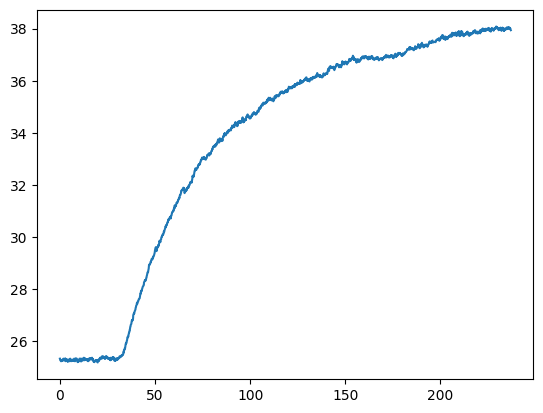

In [5]:
t = data210mW['Base tempo relativa'].to_numpy()
T = data210mW['Sp1.Valore'].to_numpy()

plt.plot(t,T)
plt.show()

In [7]:
def fit_double_exponent(t,T0,t0,ΔT1,τ1):
    exp1 = (t-t0)/τ1
    result = np.where(
        t < t0,
        T0,
        T0 + ΔT1 * (1 - np.exp(-exp1))
    )
    return result

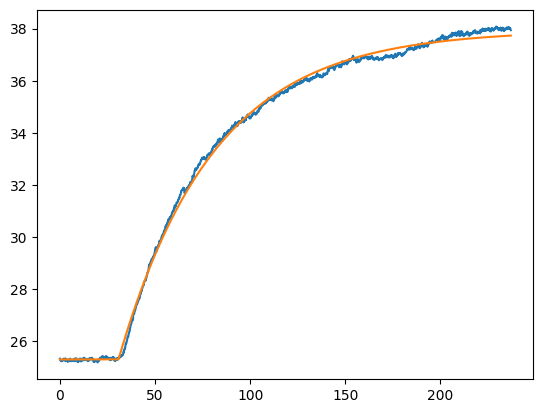

In [8]:
popt, pcov = curve_fit(fit_double_exponent, t, T, p0=[5,5,86,86])

plt.plot(t,T)
plt.plot(t,fit_double_exponent(t,*popt))
plt.show()

In [10]:
# Extracting the errors (square root of the diagonal of the covariance matrix)
errors = np.sqrt(np.diag(pcov))

# Creating a pandas DataFrame
fit_results = pd.DataFrame({
    'Parameter': ['T0', 't0', 'ΔT1', 'τ1'],
    'Value': popt,
    'Error': errors
})

display(fit_results)

,Parameter,Value,Error
0,T0,25.293602,0.010259
1,t0,30.783922,0.083485
2,ΔT1,12.648972,0.014259
3,τ1,50.243087,0.165220
